In [1]:
# Normal Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Additional Imports Needed
from pyquery import PyQuery as pq
import requests

In [162]:
%%time
# Query the online database for the requisite data
basicinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FAccessionID.htm&Limit=-1")
allinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDataOnSearchForm.htm&Limit=-1")
locationinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPassCollectLoc.htm&Limit=-1")
morphoveginfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphVegAllSpp.htm&Limit=-1")
morphoreproinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorpReproAllSpp.htm&Limit=-1")
morphoharvestinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphHarvPostAllSpp.htm&Limit=-1")
diseasereactioninfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDisease_resist.htm&Limit=-1")
envreactioninfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPhysiochem.htm&Limit=-1")

CPU times: user 40.4 s, sys: 19.3 s, total: 59.7 s
Wall time: 2h 38min 27s


In [201]:
%%time
# SMALLER DATA (25 varieties vs ~10^5) FOR FASTER CALL / ITERATION TIME
# Query the online database for the requisite data
basicinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FAccessionID.htm&Limit=25")
allinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDataOnSearchForm.htm&Limit=25")
locationinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPassCollectLoc.htm&Limit=25")
morphoveginfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphVegAllSpp.htm&Limit=25")
morphoreproinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorpReproAllSpp.htm&Limit=25")
morphoharvestinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphHarvPostAllSpp.htm&Limit=25")
diseasereactioninfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDisease_resist.htm&Limit=25")
envreactioninfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPhysiochem.htm&Limit=25")

CPU times: user 29.9 ms, sys: 11 ms, total: 40.8 ms
Wall time: 1min 25s



In [237]:
def dict_builder(query,rows):
    
    if query == 'basicinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                    'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
                    'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
                    'special_traits', 'fao_in_trust', 'multilateral_system']
    elif query == 'allinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                'pedigree', 'collection_number', 'acc_id_seed_donor_number',
                'source_country', 'cultural_type','days_to_mat', 'grain_len',
                'grain_wid', 'varietal_group', 'endosperm_type', 'endosperm_color',
                'seed_coat_color', 'rice_blast', 'bacterial_blight', 'sheath_blight']
    elif query == 'locationinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'province',
                'district', 'town', 'village', 'latitude', 'longitude', 'altitude']
    elif query == 'morphoveginfo':
        fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                'source_country', 'blade_pub', 'blade_color', 'basal_color', 'ligule_shape',
                'leaf_texture', 'leaf_angle', 'seedling_height', 'ligule_color', 
                'collar_color', 'auricle_color']
    elif query == 'morphoreproinfo':
        fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                'source_country', 'culm_angle', 'node_color', 'internode_color', 
                'internode_color', 'culm_strength', 'flat_leaf_angle', 'flag_leaf_angle',
                'panicle', 'secondary_branching', 'panicle_exerion', 'panicle_axis',
                'awn_presence', 'awn_color', 'apiculus_color', 'stigma_color', 'lemma_color',
                'leaf_length', 'leaf_width', 'culm_length', 'culm_num', 'culm_diam', 
                'days_to_head', 'variety_group_from_morph', 'days_to_flower', 'lingule_pub',
                'lemma_color_at_anthesis', 'internode_color','culm_strength_cult']
    elif query == 'morphoharvestinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'days_to_maturity', 'panicle_shattering', 'leaf_senescence', 'spikelet_fertility',
                'panicle_thesability', 'apiculus_color_post_harv', 'lemma_and_palea_color',
                'lemma_and_palea_pub', 'seat_coat_color']
    elif query == 'diseasereactioninfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'blast', 'bacterial_blight', 'sheath_blight', 'tungro_virus']
    elif query == 'envreactioninfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'alkali_tolerance', 'cold_tolerance', 'drought_1', 'drought_2',
                'drought_3', 'drought_4', 'drought_5', 'drought_6', 'drought_7',
                'drought_8', 'drought_9', 'elogation', 'flood_tolerance', 
                'salt_tolerance', 'zinc_def_1', 'zinc_def_1']
    else:
        fields =[]

    ricestrains=[]
    
    for r in rows:
        # Extract the "td" element from the current value of r.
        d_td=pq(r)('td')

        a = [pq(d_td[i]).text() for i in range(0,len(pq(d_td)))]

        ricedict = dict(zip(fields,a))
        ricestrains.append(ricedict)
    
    return ricestrains

In [276]:
# print "basicinfo: 131,112 rows"
# print "allinfo: 134,842 rows"
# print "locationinfo: 127,128 rows"
# print "morphoveginfo: 130,800 rows"
# print "morphoreproinfo: 130,800 rows"
# print "morphoharvestinfo: 130,800 rows"
# print "diseasereactioninfo: 127,128 rows"
# print "envreactioninfo: 127,128 rows"

In [275]:
# d_= pq(basicinfo25.text)
# d_rows = pq(d_('tr')[4:])
# d_rows = pq(d_rows[:(len(d_rows)-1)])
# print pq(d_rows[10])

In [261]:
%%time
scrapedlist = [('basicinfo',basicinfo), ('allinfo',allinfo), 
              ('locationinfo',locationinfo), ('morphoveginfo',morphoveginfo),
              ('morphoreproinfo',morphoreproinfo), ('morphoharvestinfo',morphoharvestinfo), 
              ('diseasereactioninfo',diseasereactioninfo), ('envreactioninfo',envreactioninfo)]

dict_list=[]

for k,v in scrapedlist:
    
    d_= pq(v.text)
    d_rows = pq(d_('tr')[4:])
    d_rows = pq(d_rows[:(len(d_rows)-1)])

    dict_list.append((k, dict_builder(k,pq(d_rows))))

CPU times: user 6min 28s, sys: 18.8 s, total: 6min 47s
Wall time: 6min 50s


In [343]:
scrapedlistsmall = [('basicinfo',basicinfo25), ('allinfo',allinfo25), 
              ('locationinfo',locationinfo25), ('morphoveginfo',morphoveginfo25),
              ('morphoreproinfo',morphoreproinfo25), ('morphoharvestinfo',morphoharvestinfo25), 
              ('diseasereactioninfo',diseasereactioninfo25), ('envreactioninfo',envreactioninfo25)]

dict_list2=[]

for k,v in scrapedlistsmall:
    
    d_= pq(v.text)
    d_rows = pq(d_('tr')[4:])
    d_rows = pq(d_rows[:(len(d_rows)-1)])

    dict_list2.append((k, dict_builder(k,pq(d_rows))))

In [ ]:
df_list = []

for k,v in dict_list:
    a = pd.DataFrame(v)
    a.to_pickle(k)
    
    #df_list.append(a)
    
#for df in df_list
    
# scrapeddf = pd.merge(df_list[0],df_list[1],on='strain_id')
# scrapeddf = pd.merge(scrapeddf,df_list[2],on='strain_id')
# scrapeddf = pd.merge(scrapeddf,df_list[3],on='strain_id')
# scrapeddf = pd.merge(scrapeddf,df_list[4],on='strain_id')
# scrapeddf = pd.merge(scrapeddf,df_list[5],on='strain_id')
# scrapeddf = pd.merge(scrapeddf,df_list[6],on='strain_id')
# scrapeddf = pd.merge(scrapeddf,df_list[7],on='strain_id')

# print scrapeddf.shape


In [439]:
len(np.unique(scrapeddf['strain_id']))

127128

In [407]:
for k,v in dict_list:
    print k + " rows: " + str(len(v))

basicinfo rows: 131112
allinfo rows: 134842
locationinfo rows: 127128
morphoveginfo rows: 130800
morphoreproinfo rows: 130800
morphoharvestinfo rows: 130800
diseasereactioninfo rows: 127128
envreactioninfo rows: 127128


In [ ]:
# FUN SOUND BIT
from IPython.display import Audio
sound_file = 'http://sfxcontent.s3.amazonaws.com/soundfx/EmergencyAlertSystemBeep.mp3'
Audio(url=sound_file, autoplay=True)

In [2]:
df1 =pd.read_csv("index.csv")

In [3]:
df1.dtypes

Entry_No                               object
Source                                 object
DNA_UNIQUE_ID                          object
DNA_Designation                        object
DNA_Accno_source                       object
DNA_VARNAME_source                     object
DNA_Othername_source                   object
ORI_COUNTRY                            object
Unnamed: 8                             object
Genetic_Stock_Accno                    object
Genetic_stock_Designation(varname)     object
total seq count                       float64
passed qc seq count                   float64
depth                                  object
Variety Group (Tree)1                  object
dtype: object

In [4]:
# Clean page text to find only the rows corresponding to be data on rice (poor HTML formatting)
"""ADD IN A FOR LOOP TO ITERATE THROUGH THIS ISH"""
d_= pq(basicinfo.text)
d_rows = pq(d_('tr')[4:])
d_rows = pq(d_rows[:(len(d_rows)-1)])

NameError: name 'basicinfo' is not defined

In [156]:
# Start by creating an empty list.
ricestrains=[]
fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
        'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
        'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
        'special_traits', 'fao_in_trust', 'multilateral_system']

# Iterate over the elements of d_rows. In this case "r" will
# receive each value from "d_rows" in turn.
for r in d_rows:
    # Extract the "td" element from the current value of r.
    d_td=pq(r)('td')
    
    strain_id =  int(pq(d_td[0]).text())
    species_name = pq(d_td[1]).text()
    variety_name = pq(d_td[2]).text()
    previous_name = pq(d_td[3]).text()
    pedigree = pq(d_td[4]).text()
    collection_num = pq(d_td[5]).text()
    acc_id_seq_num = pq(d_td[6]).text()
    acc_id_seed_don_num = pq(d_td[7]).text()
    source_country = pq(d_td[8]).text()
    donor_country = pq(d_td[9]).text()
    acc_date = pq(d_td[10]).text()
    status = pq(d_td[11]).text()
    cultural_type = pq(d_td[12]).text()
    special_traits = pq(d_td[13]).text()
    fao_in_trust = pq(d_td[14]).text()
    multi_later_sys = pq(d_td[15]).text()
    
    a = [strain_id, species_name, variety_name, previous_name,
         pedigree, collection_num, acc_id_seq_num, acc_id_seed_don_num,
         source_country, donor_country, acc_date, status, cultural_type,
         special_traits, fao_in_trust, multi_later_sys]
    
    ricedict = dict(zip(fields,a))
    
    ricestrains.append(ricedict)

In [98]:
len(ricestrains)

131112

In [449]:
# # tempdf=pd.DataFrame(ricestrains)
# # tempdf.to_pickle("firstpass")
# basicinfo333 = pd.read_pickle('basicinfo')
# basicinfo333.shape

(131112, 16)

In [134]:
# d_= pq(allinfo.text)
# d_rows = pq(d_('tr')[4:])
# d_rows = pq(d_rows[:(len(d_rows)-1)])

# print d_rows

<tr bgcolor="white">&#13;
					<font size="3" color="gray">&#13;
						</font><td>&#13;
							<div align="right">83768</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left">O. sativa</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left"/>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left"/>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left">TN/NEPAL/IBPGR/85/837</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left"/>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left">00059618</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left">NEPAL</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left"/>&#13;
						</td>&#13;
						<td>&#13;
							<div align="right">113</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="right">7</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="right">2</div>&#13;
						</td>&#13;
						<td>&#13;
							<div align="left">Indica</di

In [157]:
def dict_builder(rows,query):
    
    ricestrains=[]
    for r in rows:
        # Extract the "td" element from the current value of r.
        d_td=pq(r)('td')

        a = [pq(d_td[i]).text() for i in range(0,len(pq(d_td)))]

        if query == 'basicinfo':
            fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                    'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
                    'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
                    'special_traits', 'fao_in_trust', 'multilateral_system']
        elif query == 'allinfo':
            fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                    'pedigree', 'collection_number', 'acc_id_seed_donor_number',
                    'source_country', 'cultural_type','days_to_mat', 'grain_len',
                    'grain_wid', 'varietal_group', 'endosperm_type', 'endosperm_color',
                    'seed_coat_color', 'rice_blast', 'bacterial_blight', 'sheath_blight']
        elif query == 'locationinfo':
            fields=['strain_id', 'species_name', 'variety_name', 'province',
                    'district', 'town', 'village', 'latitude', 'longitude', 'altitude']
        elif query == 'morphoveginfo':
            fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                    'source_country', 'blade_pub', 'blade_color', 'basal_color', 'ligule_shape',
                    'leaf_texture', 'leaf_angle', 'seedling_height', 'ligule_color', 
                    'collar_color', 'auricle_color']
        elif query == 'morphoreproinfo':
            fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                    'source_country', 'culm_angle', 'node_color', 'internode_color', 
                    'internode_color', 'culm_strength', 'flat_leaf_angle', 'flag_leaf_angle',
                    'panicle', 'secondary_branching', 'panicle_exerion', 'panicle_axis',
                    'awn_presence', 'awn_color', 'apiculus_color', 'stigma_color', 'lemma_color',
                    'leaf_length', 'leaf_width', 'culm_length', 'culm_num', 'culm_diam', 
                    'days_to_head', 'variety_group_from_morph', 'days_to_flower', 'lingule_pub',
                    'lemma_color_at_anthesis', 'internode_color','culm_strength_cult']
        elif query == 'morphoharvestinfo':
            fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                    'days_to_maturity', 'panicle_shattering', 'leaf_senescence', 'spikelet_fertility',
                    'panicle_thesability', 'apiculus_color_post_harv', 'lemma_and_palea_color',
                    'lemma_and_palea_pub', 'seat_coat_color']
        elif query == 'diseasereactioninfo':
            fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                    'blast', 'bacterial_blight', 'sheath_blight', 'tungro_virus']
        elif query == 'envreactioninfo':
            fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                    'alkali_tolerance', 'cold_tolerance', 'drought_1', 'drought_2',
                    'drought_3', 'drought_4', 'drought_5', 'drought_6', 'drought_7',
                    'drought_8', 'drought_9', 'elogation', 'flood_tolerance', 
                    'salt_tolerance', 'zinc_def_1', 'zinc_def_1']
        ricedict = dict(zip(fields,a))
        ricestrains.append(ricedict)
    
    return ricestrains

In [158]:
strain = dict_builder(d_rows, 'allinfo')
tempdf2=pd.DataFrame(strain)
tempdf2.head()

,acc_id_seed_donor_number,collection_number,cultural_type,days_to_mat,endosperm_color,endosperm_type,grain_len,grain_wid,pedigree,previous_name,seed_coat_color,source_country,species_name,strain_id,varietal_group,variety_name
0,1,IB 48,LIBERIA,NIGERIA,Yes,,9/7/1989,Landrace/Traditional cultivar,,,Yes,TOS5262,O. sativa,80006,,
1,1,IB 7,LIBERIA,NIGERIA,Yes,,9/7/1989,Landrace/Traditional cultivar,,,Yes,TOS5223,O. sativa,80018,,
2,1,,MAURITANIA,UNITED KINGDOM,Yes,,7/27/1990,,,,Yes,MRT 196,O. sativa,79800,,
3,1,IB 64,IVORY COAST,NIGERIA,Yes,,9/7/1989,Landrace/Traditional cultivar,,,Yes,TOS5278,O. sativa,80017,,
4,1,IB 6,LIBERIA,NIGERIA,Yes,,9/7/1989,Landrace/Traditional cultivar,,,Yes,TOS5222,O. sativa,80015,,


In [159]:
# FUN SOUND BIT
from IPython.display import Audio
sound_file = 'http://sfxcontent.s3.amazonaws.com/soundfx/EmergencyAlertSystemBeep.mp3'
Audio(url=sound_file, autoplay=True)

In [83]:
# # We'll just reuse the request object that was previously created to create a BeautifulSoup element.
# # The latter will be the equivalent of the "d_" object we created before.
# soup = BeautifulSoup(take1.text, "html.parser")

# # # In this line we are looking for a single "table" element with a class of wikitable;
# # # and then looking for all the "tr" elements on that table (notice the find vs find_all calls).
# # # Even though the syntax is very different from PyQuery, the end result is similar.
# rows = soup.find("table").find_all("tr")

# # # We then define an anonymous (lambda) function whose job it is to act on
# # #each column's element in each row in the table. Lambda functions are very
# # # handy for functional programming, and the one below should be easy to follow.
# # # The function processes each field of the parameter r accordingly. It starts by
# # # transforming the first column into an integer; it then proceeds to getting the text
# # # from the second and third elements, and finally it gets the HTTP link of the third
# # # element, and returns all that in a list (notice the surrounding brackets).
# # # The function is then bound to the cleaner variable so it can be referenced later.
# # cleaner = lambda r: [int(r[0].get_text()), r[1].get_text(), r[2].get_text(), r[2].find("a").get("href")]

# # #lambda functions are also excellent for defining one line math functions.
# # #e.g. radius = lambda x,y: np.sqrt(x*x + y*y)

# # # Next we'll create a list of names that will be used as dictionary keys.
# # fields = ["ranking", "title", "band_singer", "url"]

# # # We now use the lambda function to process each "td" element on a given row.
# # # the [... for ... in ...] construct is a list comprehension. They look weird at
# # # first but are amazingly useful and worth spending some time to learn.
# # # At a high level, thing of it as a one line "for loop" that aggregates the result
# # # of each iteration into a list. So once this line finished running, we will have a list
# # # of something.
# # #
# # # The dict function is another way to create a dictionary. One neat thing about it
# # # is that it accepts a list of key/value pairs that will be used to create said dictionary.
# # #
# # # But where are these key/value pairs coming from in here? From the zip function!
# # # The zip function will take multiple iterables (things that can be treated as a sequence)
# # # and combine them. An example might make it clearer:
# # #
# # # zip(["a", "b", "c"], [1, 2, 3]) evaluates to [("a", 1), ("b", 2), ("c", 3)]. It's like a zipper!!!
# # #
# # # Anyway, never mind the parenthesis around the pairs; they just show that the elements
# # # are grouped into tuples, which you can think of as lists that are immutable (they can't grow or shrink).
# # #
# # # So to recap: the zip function creates a list of pairs; which the dict function then uses
# # # to create a dictionary, using the first element of the pair as the key and the second as
# # # the value; and finally, the list comprehension iterates over each row element, and puts
# # # the result of each iteration on a list, which is then bound to the songs variable.
# # songs = [dict(zip(fields, cleaner(row.find_all("td")))) for row in rows]

3

[{'band_singer': 'The Guess Who',
  'ranking': 3,
  'title': 'American Woman',
  'url': '/wiki/The_Guess_Who'},
 {'band_singer': 'B.J. Thomas',
  'ranking': 4,
  'title': "Raindrops Keep Fallin' on My Head",
  'url': '/wiki/B.J._Thomas'}]

In [12]:
basicinfo=pd.read_pickle('basicinfo').set_index('strain_id')
allinfo=pd.read_pickle('allinfo').set_index('strain_id')
diseasereactioninfo=pd.read_pickle('diseasereactioninfo').set_index('strain_id')
envreactioninfo=pd.read_pickle('envreactioninfo').set_index('strain_id')
locationinfo=pd.read_pickle('locationinfo').set_index('strain_id')
morphoharvestinfo=pd.read_pickle('morphoharvestinfo').set_index('strain_id')
morphoreproinfo=pd.read_pickle('morphoreproinfo').set_index('strain_id')
morphoveginfo=pd.read_pickle('morphoveginfo').set_index('strain_id')

In [13]:
dataframes=[basicinfo,allinfo,diseasereactioninfo,envreactioninfo,locationinfo,morphoharvestinfo,morphoreproinfo,morphoveginfo]

In [4]:
# axes=np.unique([basicinfo['strain_id'],allinfo['strain_id'],diseasereactioninfo['strain_id'],envreactioninfo['strain_id'],locationinfo['strain_id'],morphoharvestinfo['strain_id'],morphoreproinfo['strain_id'],morphoveginfo['strain_id']])
# combinedinfo=pd.concat(dataframes,axis=1,join_axes=axes)

In [5]:
#combinedinfo.shape

In [66]:
#combinedinfo.to_csv('combinedinfo.csv', encoding='utf-8')

In [3]:
#combinedinfo

In [14]:
print basicinfo.shape
print allinfo.shape
print diseasereactioninfo.shape
print envreactioninfo.shape
print locationinfo.shape
print morphoharvestinfo.shape
print morphoreproinfo.shape
print morphoveginfo.shape

(131112, 15)
(134842, 17)
(127128, 7)
(127128, 18)
(127128, 9)
(130800, 12)
(130800, 29)
(130800, 14)


In [15]:
full_ids=allinfo.index.tolist();

In [16]:
len(full_ids)

134842

In [29]:
#updated
def create_new_dataframe(ids, dfs):
    columns=[]
    for d in dfs:
        columns.extend(list(d.columns.values))
    columns=np.unique(columns)
    fdf=pd.DataFrame(columns=columns)
    counter=0
    print "Progress:"
    for i in ids:
        counter +=1
        if (counter%5000)==0:
            print counter
        row={}
        for d in dfs:
            if str(i) in d.index.values:
                row.update(d.loc[str(i)].to_dict())
        fdf=fdf.append(pd.DataFrame(row, index=[i]))
    return fdf

In [30]:
merged_df=pd.read_csv("merged_dataframe.csv")
unique_ids=merged_df.strain_id.tolist()

In [31]:
test=create_new_dataframe(unique_ids, dataframes)
test.head()

Progress:


,acc_date,acc_id_seed_donor_number,acc_id_seq_num,alkali_tolerance,altitude,apiculus_color,apiculus_color_post_harv,auricle_color,awn_color,awn_presence,bacterial_blight,basal_color,blade_color,blade_pub,blast,cold_tolerance,collar_color,collection_number,culm_angle,culm_diam,culm_length,culm_num,culm_strength,cultural_type,days_to_flower,days_to_head,days_to_mat,days_to_maturity,district,donor_country,drought_1,drought_2,drought_3,drought_4,drought_5,drought_6,drought_7,drought_8,drought_9,elogation,endosperm_color,endosperm_type,fao_in_trust,flag_leaf_angle,flat_leaf_angle,flood_tolerance,grain_len,grain_wid,internode_color,latitude,leaf_angle,leaf_length,leaf_senescence,leaf_texture,leaf_width,lemma_and_palea_color,lemma_and_palea_pub,lemma_color,lemma_color_at_anthesis,ligule_color,ligule_shape,lingule_pub,longitude,multilateral_system,node_color,panicle,panicle_axis,panicle_exerion,panicle_shattering,panicle_thesability,pedigree,previous_name,province,rice_blast,salt_tolerance,seat_coat_color,secondary_branching,seed_coat_color,seedling_height,sheath_blight,source_country,special_traits,species_name,spikelet_fertility,status,stigma_color,subpopulation,town,tungro_virus,varietal_group,variety_group_from_morph,variety_name,village,zinc_def_1
121902,12/1/2010,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,PHILIPPINES,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,AFGHANISTAN,,O. sativa,X,,X,A,,0,,,BERENJ 1277 S::IRGC 3461-1,,X
127120,5/1/2011,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,PHILIPPINES,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,UNKNOWN,,O. sativa,X,,X,A,,0,,,AMBARIKORI::IRGC 5132-1,,X
122208,1/28/2010,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,FRANCE,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,ARGENTINA,,O. sativa,X,,X,A,,0,,,PRECOZ 2 F A::GERVEX 1182-C1,,X
125751,11/1/2009,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,PHILIPPINES,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,ARGENTINA,,O. sativa,X,,X,A,,0,,,GENIT::IRGC 3272-1,,X
121947,1/28/2010,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,FRANCE,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,ARGENTINA,,O. sativa,X,,X,A,,0,,,104 UPLA::GERVEX 167-C1,,X


In [32]:
all_info=create_new_dataframe(full_ids, dataframes)
all_info.to_csv('all_info_combined2.csv')

Progress:
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000


UnicodeEncodeError: 'ascii' codec can't encode character u'\x9e' in position 0: ordinal not in range(128)

In [18]:
%%time
snps1=pd.read_csv('SNP_Data/snps1.csv', index_col=0)
snps2=pd.read_csv('SNP_Data/snps2.csv', index_col=0)

CPU times: user 60 s, sys: 8.28 s, total: 1min 8s
Wall time: 1min 9s


In [19]:
snps1.shape

(50000, 3023)

In [20]:
snps1.head()

,B001_B001,B002_B002,B003_B003,B004_B004,B005_B005,B006_B006,B007_B007,B008_B008,B009_B009,B010_B010,B011_B011,B012_B012,B013_B013,B014_B014,B015_B015,B016_B016,B017_B017,B018_B018,B019_B019,B020_B020,B021_B021,B023_B023,B024_B024,B025_B025,B026_B026,B027_B027,B028_B028,B029_B029,B030_B030,B031_B031,B032_B032,B033_B033,B034_B034,B035_B035,B036_B036,B037_B037,B038_B038,B039_B039,B040_B040,B043_B043,B044_B044,B045_B045,B046_B046,B047_B047,B048_B048,B049_B049,B051_B051,B052_B052,B053_B053,B054_B054,...,IRIS_313-9822_IRIS_313-9822,IRIS_313-9825_IRIS_313-9825,IRIS_313-9831_IRIS_313-9831,IRIS_313-9832_IRIS_313-9832,IRIS_313-9838_IRIS_313-9838,IRIS_313-9839_IRIS_313-9839,IRIS_313-9841_IRIS_313-9841,IRIS_313-9851_IRIS_313-9851,IRIS_313-9861_IRIS_313-9861,IRIS_313-9862_IRIS_313-9862,IRIS_313-9867_IRIS_313-9867,IRIS_313-9880_IRIS_313-9880,IRIS_313-9882_IRIS_313-9882,IRIS_313-9884_IRIS_313-9884,IRIS_313-9886_IRIS_313-9886,IRIS_313-9887_IRIS_313-9887,IRIS_313-9890_IRIS_313-9890,IRIS_313-9891_IRIS_313-9891,IRIS_313-9897_IRIS_313-9897,IRIS_313-9898_IRIS_313-9898,IRIS_313-9917_IRIS_313-9917,IRIS_313-9922_IRIS_313-9922,IRIS_313-9924_IRIS_313-9924,IRIS_313-9925_IRIS_313-9925,IRIS_313-9926_IRIS_313-9926,IRIS_313-9928_IRIS_313-9928,IRIS_313-9929_IRIS_313-9929,IRIS_313-9935_IRIS_313-9935,IRIS_313-9936_IRIS_313-9936,IRIS_313-9937_IRIS_313-9937,IRIS_313-9939_IRIS_313-9939,IRIS_313-9940_IRIS_313-9940,IRIS_313-9944_IRIS_313-9944,IRIS_313-9949_IRIS_313-9949,IRIS_313-9953_IRIS_313-9953,IRIS_313-9961_IRIS_313-9961,IRIS_313-9963_IRIS_313-9963,IRIS_313-9964_IRIS_313-9964,IRIS_313-9966_IRIS_313-9966,IRIS_313-9968_IRIS_313-9968,IRIS_313-9969_IRIS_313-9969,IRIS_313-9970_IRIS_313-9970,IRIS_313-9974_IRIS_313-9974,IRIS_313-9976_IRIS_313-9976,IRIS_313-9978_IRIS_313-9978,IRIS_313-9980_IRIS_313-9980,IRIS_313-9986_IRIS_313-9986,IRIS_313-9989_IRIS_313-9989,IRIS_313-9995_IRIS_313-9995,IRIS_313-9996_IRIS_313-9996
1_1203,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,1/1,1/1,NaN,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,1/1,0/0,1/1,NaN,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,1/1,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/1,NaN,...,0/0,0/0,1/1,1/1,0/0,0/0,0/0,0/0,1/1,1/1,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,NaN,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,1/1,0/0,0/0,1/1,1/1,1/1,0/0,1/1,NaN,0/0,0/0,0/0,0/0,0/0
1_1248,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1_1282,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1_1299,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1_1787,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [21]:
snps=snps1.append(snps2)

In [22]:
snps.shape

(100000, 3023)

In [ ]:
import vcf
vcf_reader=vcf.Reader(open('../plink.vcf', 'r'))

In [1]:
%%time
import vcf
vcf_reader=vcf.Reader(open('../plink.vcf', 'r'))
snpdf=pd.DataFrame(columns=vcf_reader.samples)
for i in range(1,21):
    file_name=('../SNP_Data/snps'+str(i)+'.csv')
    snps=pd.read_csv(file_name, index_col=0)
    snpdf=snpdf.append(snps)

NameError: name 'pd' is not defined

In [2]:
snpdf.shape

NameError: name 'snpdf' is not defined

In [ ]:
snpdf.head()

In [ ]:
snpdf[-5:]

In [2]:
# i=0
# for col_name in list(snpdf):
#     if col_name[:4] != 'IRIS':
#         snpdf.drop(snpdf.columns[[i]], axis=1, inplace=True)
#     i+=1

In [28]:
mdfu=pd.read_csv('merged_dataframe_updated.csv')

In [2]:
import vcf

In [3]:
vcf_reader=vcf.Reader(open('../plink.vcf', 'r'))

In [6]:
vcf_reader.samples.

['B001_B001',
 'B002_B002',
 'B003_B003',
 'B004_B004',
 'B005_B005',
 'B006_B006',
 'B007_B007',
 'B008_B008',
 'B009_B009',
 'B010_B010',
 'B011_B011',
 'B012_B012',
 'B013_B013',
 'B014_B014',
 'B015_B015',
 'B016_B016',
 'B017_B017',
 'B018_B018',
 'B019_B019',
 'B020_B020',
 'B021_B021',
 'B023_B023',
 'B024_B024',
 'B025_B025',
 'B026_B026',
 'B027_B027',
 'B028_B028',
 'B029_B029',
 'B030_B030',
 'B031_B031',
 'B032_B032',
 'B033_B033',
 'B034_B034',
 'B035_B035',
 'B036_B036',
 'B037_B037',
 'B038_B038',
 'B039_B039',
 'B040_B040',
 'B043_B043',
 'B044_B044',
 'B045_B045',
 'B046_B046',
 'B047_B047',
 'B048_B048',
 'B049_B049',
 'B051_B051',
 'B052_B052',
 'B053_B053',
 'B054_B054',
 'B055_B055',
 'B056_B056',
 'B057_B057',
 'B058_B058',
 'B059_B059',
 'B060_B060',
 'B061_B061',
 'B062_B062',
 'B063_B063',
 'B064_B064',
 'B065_B065',
 'B066_B066',
 'B067_B067',
 'B068_B068',
 'B069_B069',
 'B070_B070',
 'B071_B071',
 'B072_B072',
 'B073_B073',
 'B074_B074',
 'B075_B075',
 'B076

In [31]:
def create_pheno(df, samples, phenotype):
    text=''
    df=df.set_index('DNA_UNIQUE_ID')
    counter=0
    for sample in samples:
        if counter !=0:
            text=text+'\n'
        if sample[:4]=='IRIS':
            und=0
            i=0
            for c in sample:
                if c=='_':
                    und+=1
                if und==2:
                    upd_sample=sample[:i]
                    break
                i+=1
        else:
            i=0
            for c in sample:
                if c=='_':
                    upd_sample=sample[:i]
                    break
                i+=1
        samp_index=upd_sample.replace('_',' ')
        if samp_index in df.index:
            if isinstance(df.ix[samp_index]["days_to_maturity"], int):
                pheno=df.ix[samp_index]["days_to_maturity"]
            else:
                pheno=-9
        else:
            pheno=-9
        text=text+upd_sample+'\t'+upd_sample+'\t'+str(pheno)
        counter+=1
    phenotype_file=open('phenotype_data.txt', 'w')
    phenotype_file.write(text)
    phenotype_file.close()

In [32]:
create_pheno(mdfu, vcf_reader.samples, 'days_to_maturity')

In [12]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

In [ ]:

# import the algorithm
from fastlmm.association import single_snp_leave_out_one_chrom
from fastlmm.association import single_snp

# set up data
##############################
bed_fn = "../plink-1.07-mac-intel/plink"
pheno_fn = "phenotype_data.txt"

# run gwas
###################################################################
results_df = single_snp_leave_out_one_chrom(bed_fn,  pheno_fn)
print 'made df'
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)

In [1]:
#import packages
import pandas as pd
import numpy as np
import leap.leapUtils as leapUtils
import leap.leapMain as leapMain
from pysnptools.snpreader.bed import Bed
from fastlmm.util.stats import plotp
import fastlmm.association as association
import pylab
import logging

/Users/oneil/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
logging.basicConfig(level=logging.WARNING)

# set figure sizes
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
pd.set_option('display.width', 1000)

In [3]:
#Define analysis data
bfile = 'plink'
phenoFile = 'phenotype_data.txt'
chromosomes = xrange(1,13)
prevalence = 0.001
bed = Bed(bfile).read().standardize()
causalSNPs = [s for s in bed.sid if 'csnp' in s] #These are the names of the causal SNPs

<bound method SnpData.kernel of SnpData(Bed('plink'),Unit())>

In [4]:
#Analyze the data with simple linear regression
linreg_df = leapUtils.linreg(bfile, phenoFile)

#print the top 10 ranking SNPs
print linreg_df.head(n=10)

loadPhen is using default missing value of '-9'.
2182 individuals appear in both the plink file and the phenotypes file


AttributeError: '_Subset' object has no attribute 'val'

In [5]:
# qq plot for non-causal SNPs only
nocsnps_df = linreg_df[~(linreg_df['SNP'].str.contains("csnp"))]
plotp.qqplot(nocsnps_df["PValue"].values, xlim=[0,5], ylim=[0,5], title="Simple Linear Regression, non-causal SNPs")
pylab.show()

NameError: name 'linreg_df' is not defined

In [2]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    #create gridsearch
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    #fit gridsearch to inputed values
    gs.fit(X, y)
    #determine best estimator and return it
    best = gs.best_estimator_
    return best

In [3]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.4f" % (training_accuracy)
    print "Accuracy on test data:     %0.4f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats.stats import pearsonr
from sklearn.svm import LinearSVC
import operator

In [19]:
def get_coeficcients(df_names):
    counter=0
    coef_dict={}
    for df_name in df_names:
        counter+=1
        
        print ('snps '+str(counter))
        
        merged_df=pd.read_csv(df_name, index_col=0)
        
        lcols=list(merged_df)
        lcols.remove('fast')
        
        itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
        mask=np.ones(merged_df.shape[0], dtype='int')
        mask[itrain]=1
        mask[itest]=0
        mask = (mask==1)
        mask.shape, mask.sum()
        
        clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        coefs=dict(zip(merged_df.columns.values[1:],clfsvm_final.coef_[0]))
        coef_dict.update(coefs)
    return coef_dict

In [20]:
dfs=['../finally1.csv','../finally2.csv','../finally3.csv',
     '../finally4.csv','../finally5.csv','../finally6.csv',
     '../finally7.csv','../finally8.csv','../finally9.csv',
     '../finally10.csv','../finally11.csv','../finally12.csv',
     '../finally13.csv','../finally14.csv','../finally15.csv',
     '../finally16.csv','../finally17.csv','../finally18.csv',
     '../finally19.csv','../finally20.csv',]

In [21]:
coefs=get_coeficcients(dfs)

snps 1
using mask
############# based on standard predict ################
Accuracy on training data: 1.0000
Accuracy on test data:     0.8578
[[561  39]
 [ 61  42]]
########################################################
snps 2
using mask
############# based on standard predict ################
Accuracy on training data: 1.0000
Accuracy on test data:     0.8777
[[577  35]
 [ 51  40]]
########################################################
snps 3
using mask
############# based on standard predict ################
Accuracy on training data: 1.0000
Accuracy on test data:     0.8791
[[575  28]
 [ 57  43]]
########################################################
snps 4
using mask
############# based on standard predict ################
Accuracy on training data: 1.0000
Accuracy on test data:     0.8791
[[573  43]
 [ 42  45]]
########################################################
snps 5
using mask
############# based on standard predict ################
Accuracy on training data: 1.0000

/Users/oneil/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


    snps 1
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8578
    [[561  39]
     [ 61  42]]
    ########################################################
    snps 2
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8777
    [[577  35]
     [ 51  40]]
    ########################################################
    snps 3
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8791
    [[575  28]
     [ 57  43]]
    ########################################################
    snps 4
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8791
    [[573  43]
     [ 42  45]]
    ########################################################
    snps 5
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8535
    [[556  32]
     [ 71  44]]
    ########################################################
    snps 6
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9988
    Accuracy on test data:     0.8634
    [[551  30]
     [ 66  56]]
    ########################################################
    snps 7
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8691
    [[563  37]
     [ 55  48]]
    ########################################################
    snps 8
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9976
    Accuracy on test data:     0.8734
    [[560  27]
     [ 62  54]]
    ########################################################
    snps 9
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9994
    Accuracy on test data:     0.8848
    [[580  27]
     [ 54  42]]
    ########################################################
    snps 10
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9976
    Accuracy on test data:     0.8606
    [[560  38]
     [ 60  45]]
    ########################################################
    snps 11
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8791
    [[562  25]
     [ 60  56]]
    ########################################################
    snps 12
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9994
    Accuracy on test data:     0.8663
    [[550  41]
     [ 53  59]]
    ########################################################
    snps 13
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9988
    Accuracy on test data:     0.8720
    [[572  32]
     [ 58  41]]
    ########################################################
    snps 14
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8890
    [[575  29]
     [ 49  50]]
    ########################################################
    snps 15
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8578
    [[559  30]
     [ 70  44]]
    ########################################################
    snps 16
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8777
    [[564  29]
     [ 57  53]]
    ########################################################
    snps 17
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8805
    [[563  35]
     [ 49  56]]
    ########################################################
    snps 18
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9988
    Accuracy on test data:     0.8634
    [[555  43]
     [ 53  52]]
    ########################################################
    snps 19
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8578
    [[563  22]
     [ 78  40]]
    ########################################################
    snps 20
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9994
    Accuracy on test data:     0.8805
    [[568  25]
     [ 59  51]]
    ########################################################

In [24]:
coefs

{'7_14605102': 0.00042904606015723091,
 '12_13999303': -0.00092770093604699691,
 '4_13349242': -0.0011250951797337424,
 '5_10457940': 5.2089674023219415e-05,
 '4_5822480': 0.00022526265508999267,
 '11_1064516': -0.0020771643817152543,
 '10_12714173': -6.756789790697925e-05,
 '6_21442699': -0.0033770544045126413,
 '4_31530545': -0.0050692374090975188,
 '1_22458129': 0.0015851278788225755,
 '7_26597868': -4.0998158491791851e-05,
 '3_19608378': 2.2228674381113898e-05,
 '1_4712435': 0.00082545369183375551,
 '5_18721760': 2.4861880938893943e-05,
 '1_19071429': -0.00065245857354613536,
 '2_19338335': 0.0039978879319253792,
 '10_11743383': 0.0019792535934631652,
 '4_1741344': 0.00019725757790544439,
 '9_129250': -0.00013092358486467836,
 '4_27088660': 0.0025670760817659288,
 '8_19830899': 0.0013844903836446709,
 '7_6401621': 0.0040229036638500517,
 '10_1104543': -0.00073904268896260645,
 '8_25443011': 0.00068893855439915164,
 '5_25117751': -0.00053854150807556038,
 '2_9592362': -6.84159557536

In [29]:
coefs_df=pd.DataFrame(coefs, index=['coefficient'])

In [30]:
coefs_df=coefs_df.transpose()
coefs_df.head()

,coefficient
10_10000022,-0.001461
10_10000106,0.006966
10_10000160,-0.001800
10_10000185,-0.000594
10_10000302,0.001894


In [31]:
new_names = []
for name in coefs_df.index.values:
    i=0
    for c in name:
        i+=1
        if c=='_':
            upd_name=int(name[i:])
            break
    new_names.append(upd_name)

coefs_df.loc[:,'name']=(new_names)
coefs_df.set_index('name',inplace=True)
coefs_df.head()

,coefficient
name,
10000022,-0.001461
10000106,0.006966
10000160,-0.001800
10000185,-0.000594
10000302,0.001894


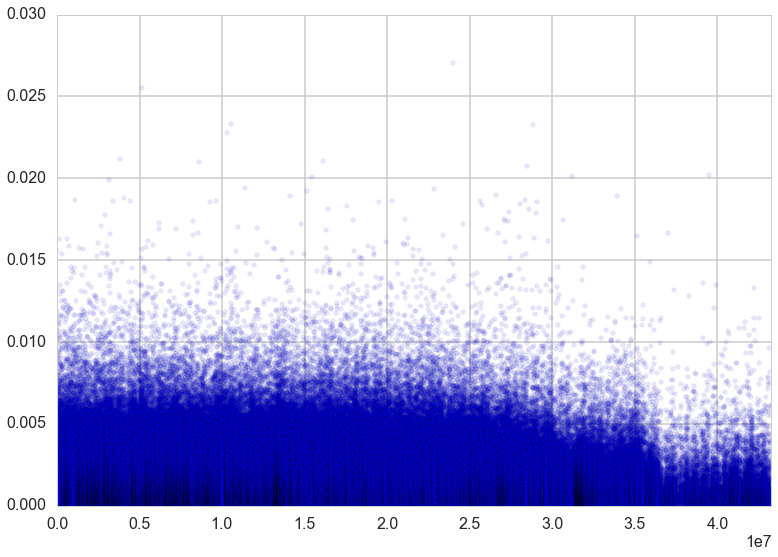

In [37]:
plt.scatter(coefs_df.index.values,abs(coefs_df['coefficient']),alpha=.1)
plt.axis([0,np.max(coefs_df.index.values),0,.03]);

In [38]:
coefs_df.to_csv('coefs_df.csv')